In [ ]:
!pip install keras 
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, json, math, librosa
import IPython.display as ipd
import librosa.display
import tensorflow as tf
import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from google.colab import drive
from statistics import mode
from google.colab import files
import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pathlib
drive.mount('/content/drive')

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path('/content/drive/MyDrive/Deep_Project/Spectograms')

Mounted at /content/drive


**RESNET 50 MODEL**
-------------------------------

In [ ]:
def ResNet_50(data_dir):
  img_height,img_width=180,180
  batch_size=32
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  resnet_model = Sequential()

  pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet')
  for layer in pretrained_model.layers:
          layer.trainable=False

  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dense(2, activation='softmax'))
  resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)
  
  
  
  
  
  fig1 = plt.gcf()
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.axis(ymin=0.4,ymax=1.8)
  plt.grid()
  plt.title('Model Accuracy ReNet50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = "lower right")
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc = "upper left")
  plt.show()

**MobileNet V2 MODEL**
-------------------------------

In [ ]:
def MobileNetV2(data_dir):
  img_height,img_width=180,180
  batch_size=32
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  resnet_model = Sequential()

  pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet')
  for layer in pretrained_model.layers:
          layer.trainable=False

  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dense(2, activation='softmax'))
  resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)
  
  
  
  
  
  fig1 = plt.gcf()
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.axis(ymin=0.4,ymax=1.8)
  plt.grid()
  plt.title('Model Accuracy MobileNetV2')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = "lower right")
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc = "upper left")
  plt.show()

**VGG 16 MODEL**
-------------------------------

In [ ]:
def VGG16(data_dir):
  img_height,img_width=180,180
  batch_size=32
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  resnet_model = Sequential()

  pretrained_model= tf.keras.applications.VGG16(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet',classifier_activation="softmax")
  for layer in pretrained_model.layers:
          layer.trainable=False

  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dense(2, activation='softmax'))
  resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)
  
  
  
  
  
  fig1 = plt.gcf()
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.axis(ymin=0.4,ymax=1.8)
  plt.grid()
  plt.title('Model Accuracy VGG16')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = "lower right")
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc = "upper left")
  plt.show()

**XCEPTION MODEL**
-------------------------------

In [ ]:
def Xception(data_dir):
  img_height,img_width=180,180
  batch_size=32
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  resnet_model = Sequential()

  pretrained_model= tf.keras.applications.Xception(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet',classifier_activation="softmax")
  for layer in pretrained_model.layers:
          layer.trainable=False

  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dense(2, activation='softmax'))
  resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)
  
  
  
  
  
  fig1 = plt.gcf()
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.axis(ymin=0.4,ymax=1.8)
  plt.grid()
  plt.title('Model Accuracy Xception')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = "lower right")
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc = "upper left")
  plt.show()

**INCEPTION V3 MODEL**
-------------------------------

In [ ]:
def InceptionV3(data_dir):
  img_height,img_width=180,180
  batch_size=32
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  resnet_model = Sequential()

  pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet',classifier_activation="softmax")
  for layer in pretrained_model.layers:
          layer.trainable=False

  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dense(2, activation='softmax'))
  resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)
  
  
  
  
  
  fig1 = plt.gcf()
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.axis(ymin=0.4,ymax=1.8)
  plt.grid()
  plt.title('Model Accuracy Inception V3')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = "lower right")
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc = "upper left")
  plt.show()

**DENSENET 121 MODEL**
-------------------------------

In [ ]:
def DenseNet121(data_dir):
  img_height,img_width=180,180
  batch_size=32
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  resnet_model = Sequential()

  pretrained_model= tf.keras.applications.DenseNet121(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet',classifier_activation="softmax")
  for layer in pretrained_model.layers:
          layer.trainable=False

  resnet_model.add(pretrained_model)
  resnet_model.add(Flatten())
  resnet_model.add(Dense(512, activation='relu'))
  resnet_model.add(Dense(2, activation='softmax'))
  resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)
  
  
  
  
  fig1 = plt.gcf()
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  #plt.axis(ymin=0.4,ymax=1.8)
  plt.grid()
  plt.title('Model Accuracy DenseNet 121')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = "lower right")
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc = "upper left")
  plt.show()

**MODELS EVALUATION**
-------------------------------

Found 88 files belonging to 2 classes.
Using 71 files for training.
Found 88 files belonging to 2 classes.
Using 17 files for validation.
Epoch 1/20
3/3 [==============================] - 16s 4s/step - loss: 1.2094 - accuracy: 0.5352 - val_loss: 0.4429 - val_accuracy: 0.8235
Epoch 2/20
3/3 [==============================] - 12s 4s/step - loss: 1.1163 - accuracy: 0.6197 - val_loss: 0.2269 - val_accuracy: 0.8824
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 0.2518 - accuracy: 0.9014 - val_loss: 0.9806 - val_accuracy: 0.2353
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 0.5416 - accuracy: 0.5634 - val_loss: 0.1313 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 11s 3s/step - loss: 0.1723 - accuracy: 0.9296 - val_loss: 0.1958 - val_accuracy: 0.8824
Epoch 6/20
3/3 [==============================] - 11s 3s/step - loss: 0.2978 - accuracy: 0.8732 - val_loss: 0.1484 - val_accuracy: 0.8824
Epoch 7/20
3/3 [==================

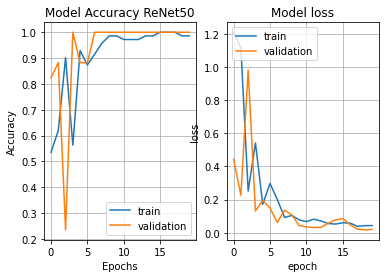

Found 88 files belonging to 2 classes.
Using 71 files for training.
Found 88 files belonging to 2 classes.


Using 17 files for validation.
Epoch 1/20
3/3 [==============================] - 7s 1s/step - loss: 1.1925 - accuracy: 0.5352 - val_loss: 1.1964 - val_accuracy: 0.2353
Epoch 2/20
3/3 [==============================] - 2s 686ms/step - loss: 0.6156 - accuracy: 0.6761 - val_loss: 0.2285 - val_accuracy: 0.8824
Epoch 3/20
3/3 [==============================] - 2s 679ms/step - loss: 0.3514 - accuracy: 0.8169 - val_loss: 0.0914 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.1300 - accuracy: 0.9718 - val_loss: 0.2234 - val_accuracy: 0.9412
Epoch 5/20
3/3 [==============================] - 3s 677ms/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 2s 684ms/step - loss: 0.0668 - accuracy: 0.9718 - val_loss: 0.0558 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 2s 679ms/step - loss: 0.0737 - accuracy: 0.9718 - val_loss: 0.0293 - val_accuracy: 1.

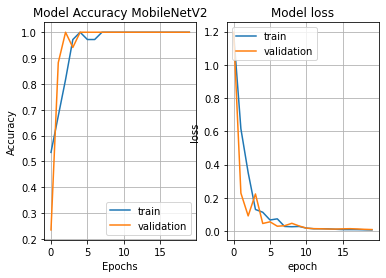

Found 88 files belonging to 2 classes.
Using 71 files for training.
Found 88 files belonging to 2 classes.
Using 17 files for validation.
Epoch 1/20
3/3 [==============================] - 30s 9s/step - loss: 4.8092 - accuracy: 0.5352 - val_loss: 0.0752 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 29s 9s/step - loss: 1.7163 - accuracy: 0.7324 - val_loss: 0.8255 - val_accuracy: 0.7647
Epoch 3/20
3/3 [==============================] - 29s 9s/step - loss: 0.5805 - accuracy: 0.8028 - val_loss: 0.2301 - val_accuracy: 0.9412
Epoch 4/20
3/3 [==============================] - 29s 9s/step - loss: 0.5003 - accuracy: 0.7183 - val_loss: 0.0731 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 31s 10s/step - loss: 0.0491 - accuracy: 0.9859 - val_loss: 8.6120e-05 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 32s 10s/step - loss: 0.0512 - accuracy: 0.9859 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/20
3/3 [============

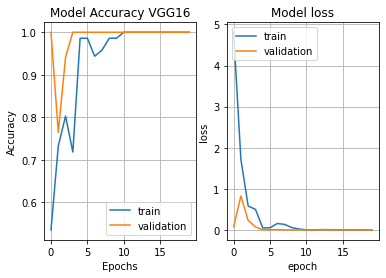

Found 88 files belonging to 2 classes.
Using 71 files for training.
Found 88 files belonging to 2 classes.
Using 17 files for validation.
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/20
3/3 [==============================] - 18s 4s/step - loss: 23.2521 - accuracy: 0.5352 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 14s 5s/step - loss: 8.4134 - accuracy: 0.7324 - val_loss: 5.6899 - val_accuracy: 0.7647
Epoch 3/20
3/3 [==============================] - 11s 3s/step - loss: 4.0841 - accuracy: 0.7042 - val_loss: 14.5232 - val_accuracy: 0.2353
Epoch 4/20
3/3 [==============================] - 11s 3s/step - loss: 8.5371 - accuracy: 0.4507 - val_loss: 1.1415e-04 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 11s 3s/step - loss: 0.3369 - accuracy: 0.9577 - val_loss: 3.9869 - val_accuracy: 0.7647
Epoch 6/20
3/3 [==============================] - 11s 3s/step - loss: 6.6460 - accuracy: 0.6197 - val

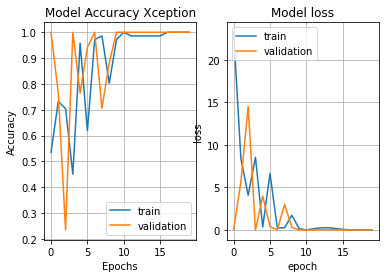

Found 88 files belonging to 2 classes.
Using 71 files for training.
Found 88 files belonging to 2 classes.
Using 17 files for validation.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/20
3/3 [==============================] - 15s 3s/step - loss: 134.6842 - accuracy: 0.5352 - val_loss: 72.4106 - val_accuracy: 0.2353
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 55.8029 - accuracy: 0.4648 - val_loss: 41.3123 - val_accuracy: 0.7647
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 70.1166 - accuracy: 0.5775 - val_loss: 9.1386 - val_accuracy: 0.7647
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 10.0066 - accuracy: 0.7465 - val_loss: 39.3322 - val_accuracy: 0.2353
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 19.6878 - accuracy: 0.4507 - val_loss: 1.2549 - val_accuracy: 0.9412
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 1.4816 - accuracy: 0.9577 - val_l

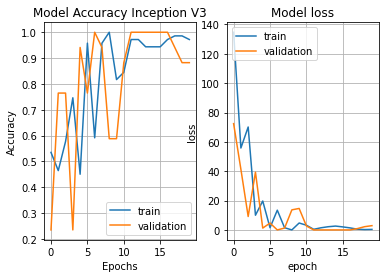

Found 88 files belonging to 2 classes.
Using 71 files for training.
Found 88 files belonging to 2 classes.
Using 17 files for validation.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/20
3/3 [==============================] - 21s 4s/step - loss: 15.2716 - accuracy: 0.5352 - val_loss: 4.1285 - val_accuracy: 0.7647
Epoch 2/20
3/3 [==============================] - 9s 3s/step - loss: 8.3515 - accuracy: 0.5775 - val_loss: 0.4077 - val_accuracy: 0.8824
Epoch 3/20
3/3 [==============================] - 9s 3s/step - loss: 1.3261 - accuracy: 0.7183 - val_loss: 0.9613 - val_accuracy: 0.6471
Epoch 4/20
3/3 [==============================] - 9s 3s/step - loss: 0.5351 - accuracy: 0.8451 - val_loss: 1.0218 - val_accuracy: 0.8235
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 0.8481 - accuracy: 0.8451 - val_loss: 0.5370 - val_accuracy: 0.9412
Epoch 6/20
3/3 [==============================] - 9s 3s/step - loss: 0.3724 - accuracy: 0.9437 - val_loss: 5.6

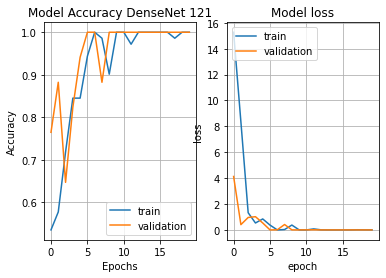

In [ ]:
entries = os.listdir('/content/drive/MyDrive/Deep_Project/Spectograms')
check = '1_Alif'
for entry in entries:
   data_dir = f'/content/drive/MyDrive/Deep_Project/Spectograms/{check}'
   ResNet_50(data_dir)
   MobileNetV2(data_dir)
   VGG16(data_dir)
   Xception(data_dir)
   InceptionV3(data_dir)
   DenseNet121(data_dir)

   break